# *Libraries*

In [60]:
import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Import Coounter
from collections import Counter

## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')


In [3]:
# Loading Data.
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


In [5]:
# lets check data
print(f'Train Dataset (row, col): {train.shape} \n')
print('\nTrain Dataset Information:\n')
print(train.info())

print(f'\nTest Dataset (row, col): {test.shape} \n')
print('\nTest Dataset Information:\n')
print(test.info())

print('\nTrain Dataset Values:\n')
train.apply(lambda x:x.unique())


Train Dataset (row, col): (891, 12) 


Train Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset (row, col): (418, 11) 


Test Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

# *Future Engeneering*



In [6]:
# Check Dupicates
train.drop_duplicates(inplace=True)

In [7]:
# Data Summery
train.describe(include=[object, np.number])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Missing values
(train.isnull().sum()/train.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
# Combining Datasets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After combining the datasets (row,col): ', data.shape)

After combining the datasets (row,col):  (1309, 13)


In [10]:
# Fill empty and NaNs values with NaN
# Missing values
(data.isnull().sum()/data.shape[0]) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
source          0.000000
dtype: float64

In [11]:
# Lets deal with Age first
data.Age.describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

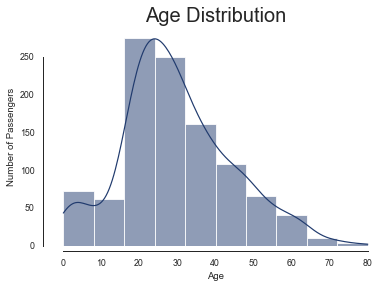

In [12]:
# Age Distribution
ax = sns.histplot(x=data['Age'], bins=10, kde=True)
ax.set_ylabel('Number of Passengers')
ax.set_title('Age Distribution', fontsize=20)
sns.despine(offset=5, trim=True)


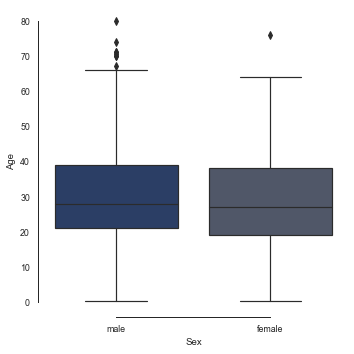

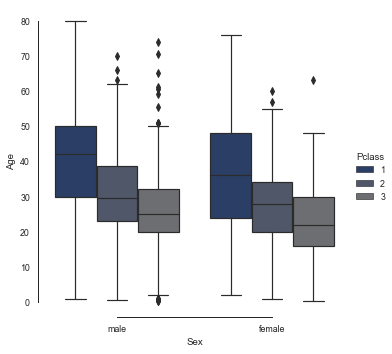

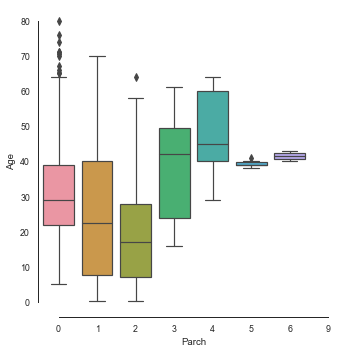

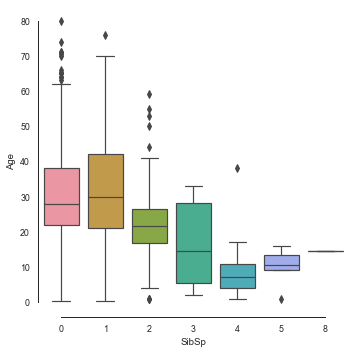

In [13]:
# Explore Age

ax = sns.catplot(y="Age",x="Sex",data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="Sex",hue="Pclass", data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="Parch", data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="SibSp", data=data,kind="box")
ax.despine(offset=1, trim=True)



## Observations
* Age and **Sex** has almost **same distribution**.
* **1st class** passenger are **older** then **2nd class**, and 2nd are **older** then **3rd class**.
* Person having more **parents/children** are **older**.
* Person having more **siblings/spouse** are **younger**.

Text(0.5, 1.0, 'Correlation of Age\n')

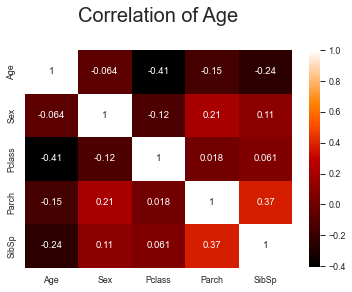

In [14]:
# Convert Sex 0, 1 into male female
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
ax = sns.heatmap(data=data[['Age','Sex','Pclass', 'Parch', 'SibSp']].corr(), cmap='gist_heat' , annot=True)
ax.set_title('Correlation of Age\n', fontsize=20)

### Observations
* Above heatmap **confirms the catplots except Parch**. age is not correlated with sex, But **negativly correlated with Parch, Pclass, SibSp**

In [15]:
# Imputate missing values of age wrt Parch, SibSp, Parch, Pclass
data['Age'] = data.groupby(['Parch', 'SibSp', 'Pclass'])['Age'].apply(lambda i:i.fillna(i.median()))
data['Age'] = data['Age'].fillna(data['Age'].median())

# delete cabin data becuase it contains % missing data
data = data.drop('Cabin', axis=1)

# fill missing values in Embarked with mode
data.Embarked = data.Embarked.fillna('S')

# Fill missing values in Fare with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [16]:
print('Missing Values afer imputation \n')
(data.isnull().sum()/data.shape[0]) * 100

Missing Values afer imputation 



PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
source          0.000000
dtype: float64

* ### Outliers

In [17]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data,2,["Age","SibSp","Parch","Fare"])

#  Show the outliers rows
print("Outliers \n\n")
data.loc[Outliers_to_drop]
#  Show the outliers rows

Outliers 




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
438,439,0.0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,S,train
587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",0,60.0,1,1,13567,79.2000,C,train
745,746,0.0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,S,train
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",1,60.0,1,4,19950,263.0000,S,test
1033,1034,NaN,1,"Ryerson, Mr. Arthur Larned",0,61.0,1,3,PC 17608,262.3750,C,test
1070,1071,NaN,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",1,64.0,0,2,PC 17756,83.1583,C,test
27,28,0.0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,S,train
88,89,1.0,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,S,train
159,160,0.0,3,"Sage, Master. Thomas Henry",0,14.5,8,2,CA. 2343,69.5500,S,train
180,181,0.0,3,"Sage, Miss. Constance Gladys",1,14.5,8,2,CA. 2343,69.5500,S,train


In [18]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,train


#### Veriable Identification
* Numeric Data
* Categorical Data

In [20]:
# # assign male and female to 0,1 in Sex
# data['Sex'] = data['Sex'].map({0:'male', 1:'female'})

# # assign 1st, 2nd, 3rd class to Pclass
# data['Pclass'] = data['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

In [21]:
# Separating Numeric and categorical Data
num_df = data.select_dtypes('number')
cat_df = data.select_dtypes('object')

In [22]:
#Numeric Data
num_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0.0,3,0,22.0,1,0,7.2500
1,2,1.0,1,1,38.0,1,0,71.2833
2,3,1.0,3,1,26.0,0,0,7.9250
3,4,1.0,1,1,35.0,1,0,53.1000
4,5,0.0,3,0,35.0,0,0,8.0500


In [23]:
cat_df.head()

,Name,Ticket,Embarked,source
0,"Braund, Mr. Owen Harris",A/5 21171,S,train
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,train
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,train
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,train
4,"Allen, Mr. William Henry",373450,S,train


#### Univariate and Bivariate Analysis
* Numeric Data
* Categorical Data

Text(0.5, 1.0, 'Correlation of Survived with  Numeric Data\n')

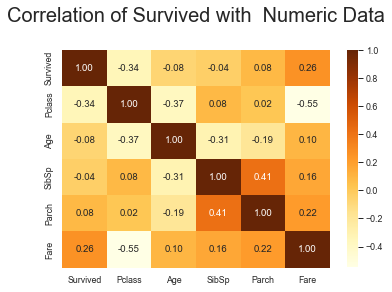

In [24]:
# Check Correlation
ax = sns.heatmap(data=train[num_df.columns[1:]].corr(), cmap='YlOrBr', fmt='.2f', annot=True)
ax.set_title('Correlation of Survived with  Numeric Data\n', fontsize=20)

### Realizations
* Only **Fare** seems to have a **positive** correlation wirh surviving.
* **Pclass** has the **worst** correlation of all with suriving

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


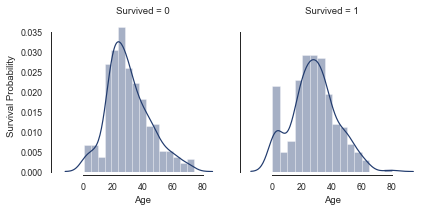

In [25]:
#  Age Vs Survived
ax = sns.FacetGrid(train, col='Survived', margin_titles=True)
ax = ax.map(sns.distplot, 'Age')
ax.set_ylabels('Survival Probability')
# ax.set_titles(['Age Survived', 'Age Not Survived'])
ax.despine(offset=3, trim=True)

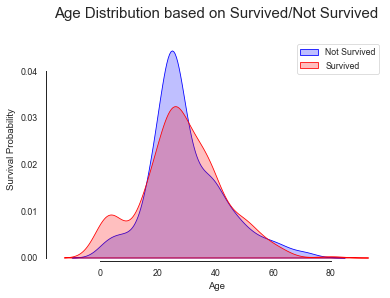

In [26]:
# Explore Age Distro
ax = sns.kdeplot(num_df[num_df["Survived"] == 0]['Age'], color='b', shade=True)
ax = sns.kdeplot(num_df[num_df["Survived"] == 1]['Age'], color='r', shade=True)
ax.set_xlabel("Age")
ax.set_ylabel("Survival Probability")
ax.set_title('Age Distribution based on Survived/Not Survived\n', fontsize=15)
sns.despine(offset=3, trim=True)
ax.legend(['Not Survived', 'Survived'])

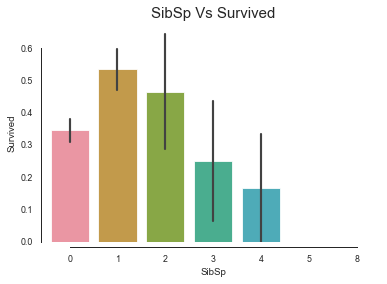

In [27]:
# Explore Survived based on SibSp
ax = sns.barplot(x='SibSp', y='Survived', data=train)
ax.set_title('SibSp Vs Survived', fontsize=15)
sns.despine(offset=5, trim=True)


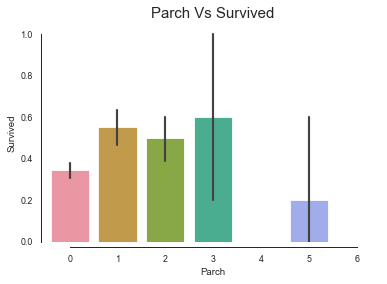

In [28]:
# Explore Survived based on parch
ax = sns.barplot(x='Parch', y='Survived', data=train)
ax.set_title('Parch Vs Survived', fontsize=15)
sns.despine(offset=5, trim=True)

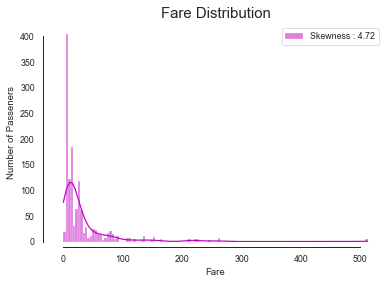

In [29]:
ax = sns.histplot(num_df['Fare'], color='m', label="Skewness : %.2f"%(num_df["Fare"].skew()), kde=True)
ax.set_ylabel('Number of Passeners')
ax.set_title('Fare Distribution', fontsize=15)
ax = ax.legend(loc="best")
sns.despine(offset=5, trim=True)



In [30]:
# Applying Log to reduce skewness
data['Fare'] = data['Fare'].apply(lambda i:np.log(i) if i > 0 else 0)

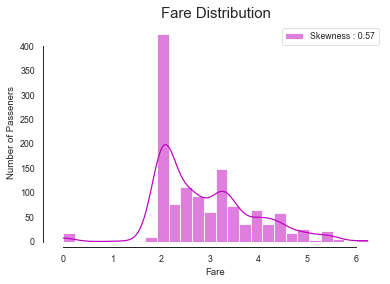

In [31]:
ax = sns.histplot(data['Fare'], color='m', label="Skewness : %.2f"%(data["Fare"].skew()), kde=True)
ax.set_ylabel('Number of Passeners')
ax.set_title('Fare Distribution', fontsize=15)
ax = ax.legend(loc="best")
sns.despine(offset=5, trim=True)

### Realizations
* Seems like there are more chances of **survivial** those who are **younger**, also we can clearly see there a peak from (0-5) **children** in 2nd chart **indecating** more chances of **surviving**.
* Passengers with **1 or 2 sibSp** have heigher chance of **surviving**
* **Small families** have more chance to **survive**, more than **single (Parch 0)**, medium (Parch 3,4) and large families (Parch 5,6 ). be carefull with 3 Parch as it has **standard deviation** 
* Fare is largly **skewed** towords **right** we fix that with **np.log** and skewness clearly **reduced after log transformation**. 

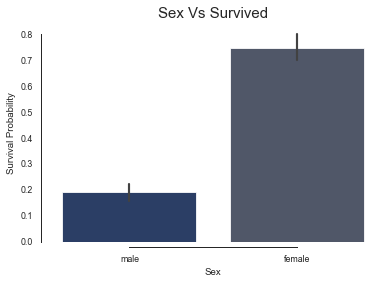

In [32]:
#Explore categorical Data

#Explore Survived based on Sex
ax = sns.barplot(x='Sex', y='Survived',data=data)
ax.set_title('Sex Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['male', 'female'])
sns.despine(offset=5, trim=True)

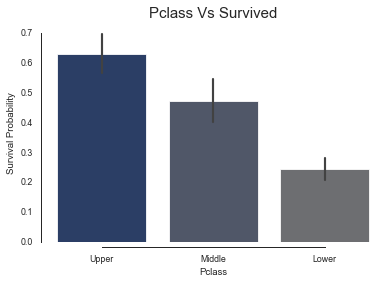

In [33]:
# Explore Survived with Pclass
ax = sns.barplot(x='Pclass', y='Survived', data=train)
ax.set_title('Pclass Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
sns.despine(offset=5, trim=True)

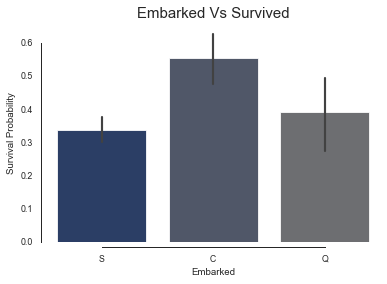

In [34]:
# Explore Survived with Embarked
ax = sns.barplot(x='Embarked', y='Survived', data=train)
ax.set_title('Embarked Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
sns.despine(offset=5, trim=True)

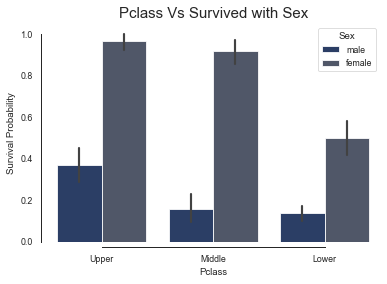

In [35]:
# Explore Survived with Pclass and Sex
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
ax.set_title('Pclass Vs Survived with Sex', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
sns.despine(offset=5, trim=True)

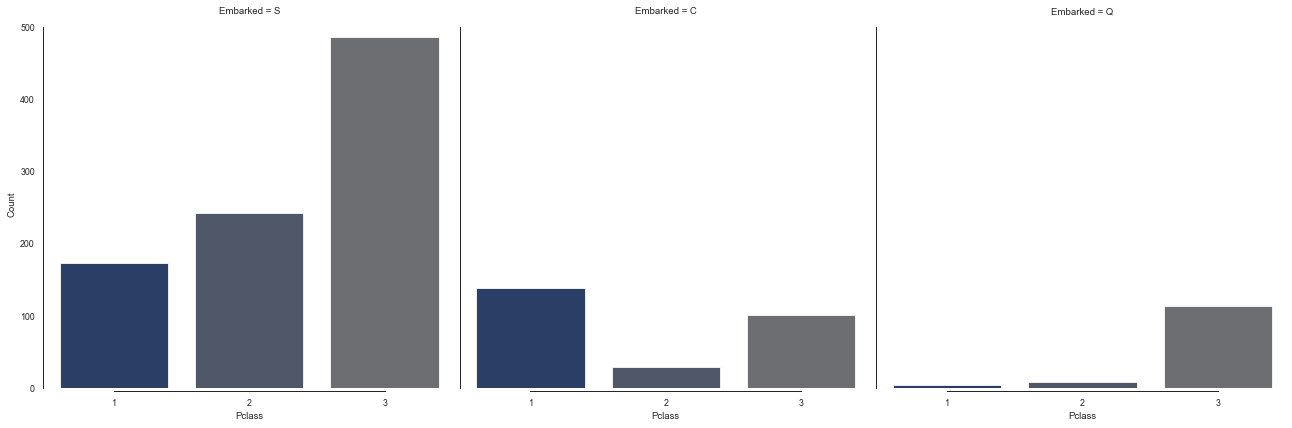

In [36]:
# Explore Survived with Pclass and Embarked
ax = sns.catplot(data=data, x='Pclass', col='Embarked', kind='count', height=6)
ax.despine(offset=3, trim=True)
ax = ax.set_ylabels('Count')

### Realizations
* **Female passengers** have higher chance of **surviving**, So **Sex**, might play an **important role** in the prediction of the survival.
* **Upper Class** passengers have higher chance of **surviving**
* **Upper Class Female** passengers have higher chance of **surviving**
* Passengers coming from **Cherbourg** (C) have higher chance of **surviving**, because most **Upper class** passengers are coming from **Cherbourg** (C), where as **lower** and **Middle** class are from **Southampton** (S) and **Queenstown** (Q) respectivley.

* ### **Future Engeneering**

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,S,train
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,S,train


In [38]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### Name Title
* We have different **titles** with names (**Mr/Miss/Lady**) etc.
* Since some passenger with **distingused title** may be preferred during the **evacuation**, it is interesting to add them to the model.

In [39]:
## Finding Titles
data['Title'] = data['Name'].apply(lambda i:i.rsplit(',')[1].split('.')[0].strip())
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'the Countess', 'Jonkheer',
       'Dona'], dtype=object)

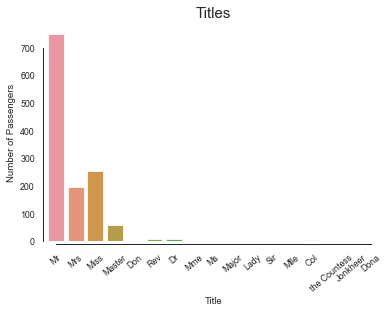

In [40]:
# Lets see Titles
ax = sns.countplot(data=data, x='Title')
ax.set_title('Titles', fontsize=15)
ax.set_ylabel('Number of Passengers')
sns.despine(offset=3, trim=True)
ax = plt.setp(ax.get_xticklabels(), rotation=40)


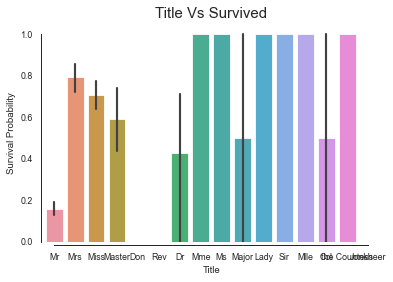

In [41]:
ax = sns.barplot(data=data[data['source'] == 'train'], x='Title', y='Survived')
ax.set_title('Title Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
sns.despine(offset=3, trim=True)

### Realizations
* total **17 titles**, but they can be **reduced**, lets convert them into **title categories**.
* It looks like the **rare titles** have more chances of **surviving**.

In [42]:
# Convert Title into categries
data['Title'] = data['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'the Countess', 'Jonkheer',
       'Dona'], 'others')
data['Title'] = data['Title'].map({'Mr':0, 'Mrs':1, 'Miss':1, 'Master':2, 'others':3})

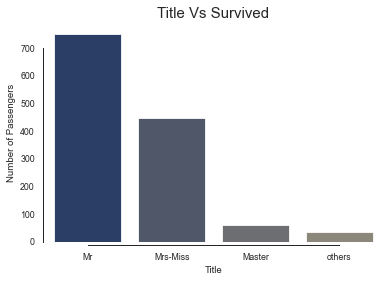

In [43]:
ax = sns.countplot(data=data, x='Title')
ax.set_ylabel('Number of Passengers')
ax.set_title('Title Vs Survived', fontsize=15)
ax = ax.set_xticklabels(['Mr', 'Mrs-Miss', 'Master', 'others'])
sns.despine(offset=3, trim=True)


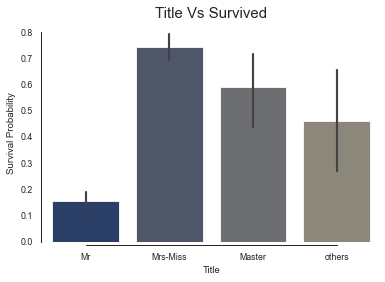

In [44]:
# Drop Name columns we don't need that now
ax = sns.barplot(data=data[data['source'] == 'train'], x='Title', y='Survived')
ax.set_title('Title Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax = ax.set_xticklabels(['Mr', 'Mrs-Miss', 'Master', 'others'])
sns.despine(offset=3, trim=True)


### Realizations
* Women and Children First

In [45]:
# Lets create new Feature called family size. +1 for passenger himself
data['Fsize'] = data['SibSp'] + data['Parch'] + 1 

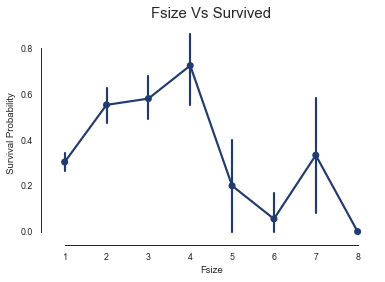

In [46]:
ax = sns.pointplot(x='Fsize', y='Survived', data=data[data['source'] == 'train'])
ax.set_title('Fsize Vs Survived', fontsize=15)
ax.set_ylabel("Survival Probability")
sns.despine(offset=3, trim=True)

### Realizations
* Family size seems to be **important**, larger family size has **worst chance of surviving**.

In [47]:
#Lets Create Family Category
def f_size(i):
    if i ==1:
        return 'Single'
    if i ==2:
        return 'SmallF'
    if i==3 or i == 4:
        return 'MedF'
    if i>4:
        return 'LargeF'
    else:
        return 'nan'
data['Fsize'] = data['Fsize'].apply(lambda i:f_size(i))

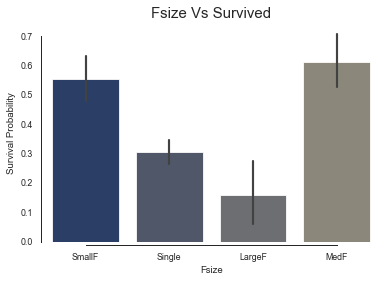

In [48]:
ax = sns.barplot(x='Fsize',y="Survived",data=data[data['source'] == 'train'])
ax.set_title('Fsize Vs Survived', fontsize=15)
ax.set_ylabel("Survival Probability")
sns.despine(offset=3, trim=True)


### Realizations
* It looks like **Med and Small Families** have more chances of **surviving**.

In [49]:
# Lets Deal with Ticket
data['Ticket'] = data.Ticket.apply(lambda i:i.replace('/', '',).replace('.', '').strip().split(' ')[0])
data['Ticket'] = data.Ticket.apply(lambda i:'X' if i.isdigit() else i)

* ### **Variable transformation**

In [50]:
# Label Encoding 
data=pd.get_dummies(data=data, columns=['Pclass', 'Sex','Ticket', 'Embarked','Title', 'Fsize'],
                     prefix=['Pc', 'Sex','Tkt', 'Em','T', 'Fm'])

In [51]:
# Unncessery Columns 
final_data = data.drop(['PassengerId', 'Name','SibSp','Parch'], axis=1)

# Separate Train and test data
final_train = final_data[final_data['source'] == 'train']
final_test = final_data[final_data['source'] == 'test']
final_train = final_train.drop('source', axis=1)
final_test = final_test.drop('source', axis=1)
final_train.head()

,Survived,Age,Fare,Pc_1,Pc_2,Pc_3,Sex_0,Sex_1,Tkt_A,Tkt_A4,...,Em_Q,Em_S,T_0,T_1,T_2,T_3,Fm_LargeF,Fm_MedF,Fm_Single,Fm_SmallF
0,0.0,22.0,1.981001,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,1.0,38.0,4.266662,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,26.0,2.070022,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1.0,35.0,3.972177,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,35.0,2.085672,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [55]:
y = final_train['Survived'] 
X=final_train.drop('Survived', axis=1)

 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 20)

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

In [57]:
y_predict

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [61]:

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7772727272727272
